In [ ]:
#Instalar as bibliotecas necessárias (caso não estejam instaladas)
!pip install transformers
!pip install openpyxl
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, pipeline
import pandas as pd

In [ ]:
#Subir arquivo diretamente no Colab
from google.colab import files
uploaded = files.upload()

Saving Comentários_Ajustados_Nvivo.xlsx to Comentários_Ajustados_Nvivo.xlsx


In [ ]:
#Carregar o dataset
file_path = list(uploaded.keys())[0]  # Obtém o nome do arquivo enviado
df = pd.read_excel(file_path)

In [ ]:
#Carregar modelo pré-treinado da Hugging Face
model_name = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'

In [ ]:
#Usar o tokenizer e modelo corretos para XLM-RoBERTa
tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
model = XLMRobertaForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [ ]:
#Criar pipeline de análise de sentimentos
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

Device set to use cpu


In [ ]:
#Aplicar a análise de sentimentos
results = nlp(df['Comentário'].tolist())

In [ ]:
#Mapear os sentimentos para valores numéricos (opcional)
sentiment_mapping = {
    'negative': 1,
    'neutral': 3,
    'positive': 5
}

In [ ]:
df['Sentimento'] = [sentiment_mapping.get(result['label'], None) for result in results]

In [ ]:
#Salvar os resultados em um novo arquivo Excel
output_file_path = '/content/here_arquivo_ml_text_output.xlsx'
df.to_excel(output_file_path, index=False)

In [ ]:
#Oferecer para download o arquivo resultante
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Instalar as bibliotecas necessárias
!pip install nltk wordcloud matplotlib seaborn

In [ ]:
#Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
#Carregar o arquivo com os comentários e sentimentos (certifique-se de fazer o upload do arquivo)
from google.colab import files
uploaded = files.upload()

Saving here_arquivo_ml_text_output.xlsx to here_arquivo_ml_text_output (1).xlsx


In [ ]:

#Carregar o dataset
file_path = 'here_arquivo_ml_text_output.xlsx'  # Use o nome do arquivo que você fez o upload
df = pd.read_excel(file_path)

<ipython-input-17-01bd8509561c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimento', data=df, palette='viridis')


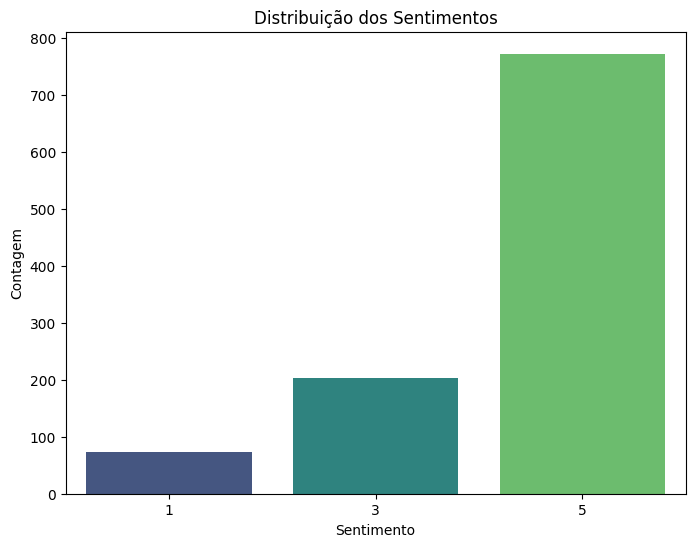

In [ ]:
#Exibição gráfica da distribuição dos sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentimento', data=df, palette='viridis')
plt.title('Distribuição dos Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

In [ ]:

#Estatísticas descritivas sobre os sentimentos
sentiment_stats = df['Sentimento'].describe()
print("Estatísticas Descritivas sobre os Sentimentos:")
print(sentiment_stats)

Estatísticas Descritivas sobre os Sentimentos:
count    1050.000000
mean        4.333333
std         1.202687
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Sentimento, dtype: float64


In [ ]:
#Análise qualitativa: Frequência de palavras
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Preparação do texto para análise de frequência
all_comments = ' '.join(df['Comentário'].dropna().tolist())

In [ ]:
#Tokenização
tokens = word_tokenize(all_comments.lower())

In [ ]:
#Remover pontuação e stopwords
stop_words = set(stopwords.words('portuguese'))  # Definindo as stopwords em português
punctuation = set(string.punctuation)  # Definindo os sinais de pontuação
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in punctuation]


In [ ]:
#Lematização: para reduzir as palavras à sua raiz (opcional, mas melhora o processo)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

In [ ]:
#Frequência das palavras
word_counts = Counter(lemmatized_tokens)
most_common_words = word_counts.most_common(10)

In [ ]:
#Exibir as 10 palavras mais comuns
print("\n10 Palavras mais comuns:")
for word, count in most_common_words:
    print(f"{word}: {count}")


10 Palavras mais comuns:
matemática: 150
parabéns: 127
mm: 111
seminário: 97
evento: 79
obrigada: 65
todos: 65
ter: 62
bom: 61
gostaria: 60


In [ ]:
#Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)


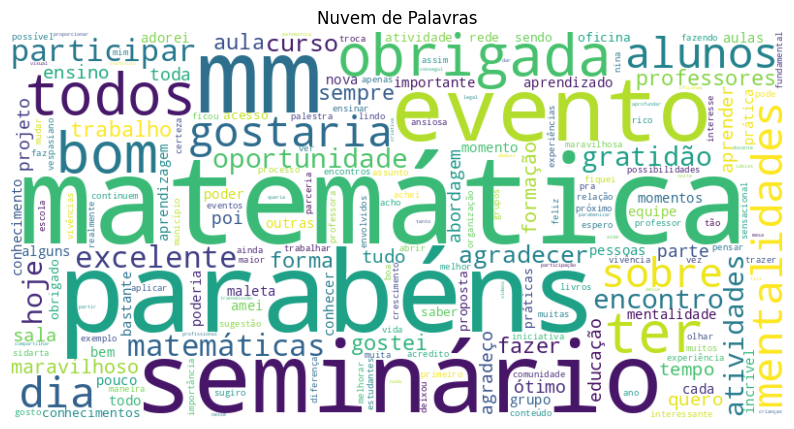

In [ ]:
#Exibir a nuvem de palavras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

In [ ]:
from nltk import ngrams
from collections import Counter

In [ ]:
#Gerar bigramas (duas palavras consecutivas)
bigrams = ngrams(filtered_tokens, 2)
bigram_counts = Counter(bigrams)

In [ ]:
#Exibir os 10 bigramas mais comuns
print("\n10 Bigramas mais comuns:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{' '.join(bigram)}: {count}")


10 Bigramas mais comuns:
mentalidades matemáticas: 43
sala aula: 24
parabéns evento: 13
fazer parte: 12
ensino matemática: 12
mentalidade matemática: 12
quero agradecer: 11
agradecer oportunidade: 11
parabéns todos: 9
gostaria agradecer: 8


In [ ]:
#Gerar trigramas (três palavras consecutivas)
trigrams = ngrams(filtered_tokens, 3)
trigram_counts = Counter(trigrams)

In [ ]:
#Exibir os 10 trigramas mais comuns
print("\n10 Trigramas mais comuns:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{' '.join(trigram)}: {count}")


10 Trigramas mais comuns:
sobre mentalidades matemáticas: 5
saber sobre maleta: 5
primeiro dia seminário: 4
quero agradecer oportunidade: 4
parabéns toda equipe: 4
ensinar aprender matemática: 3
gostaria saber sobre: 3
bom participar desse: 3
participar desse seminário: 3
parabéns equipe mm: 3


In [ ]:
from nltk import ngrams
from collections import defaultdict

# Análise de sentimentos para bigramas
bigram_sentiment = defaultdict(lambda: {'positive': 0, 'neutral': 0, 'negative': 0})

# Percorrer os comentários e os bigramas para classificar sentimentos
for comment, sentiment in zip(df['Comentário'], df['Sentimento']):
    tokens = word_tokenize(comment.lower())
    bigrams_in_comment = ngrams(tokens, 2)
    for bigram in bigrams_in_comment:
        sentiment_label = 'positive' if sentiment > 3 else 'negative' if sentiment < 3 else 'neutral'
        bigram_sentiment[bigram][sentiment_label] += 1

# Exibir os bigramas com maior associação a sentimentos
for bigram, sentiment_counts in bigram_sentiment.items():
    print(f"Bigram: {' '.join(bigram)} | Sentimentos: {sentiment_counts}")

Bigram: muita demora | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: demora para | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: para resolveremos | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: resolveremos meu | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: meu acesso | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: acesso aos | Sentimentos: {'positive': 1, 'neutral': 0, 'negative': 1}
Bigram: aos cursos | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: cursos autoformativos | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: autoformativos '' | Sentimentos: {'positive': 0, 'neutral': 0, 'negative': 1}
Bigram: adorei o | Sentimentos: {'positive': 5, 'neutral': 0, 'negative': 0}
Bigram: o primeiro | Sentimentos: {'positive': 5, 'neutral': 0, 'negative': 1}
Bigram: primeiro encontro | Sentimentos: {'positive': 1, 'neutral': 0, 'negative': 0}
Bigram: encon

In [ ]:
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 32.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


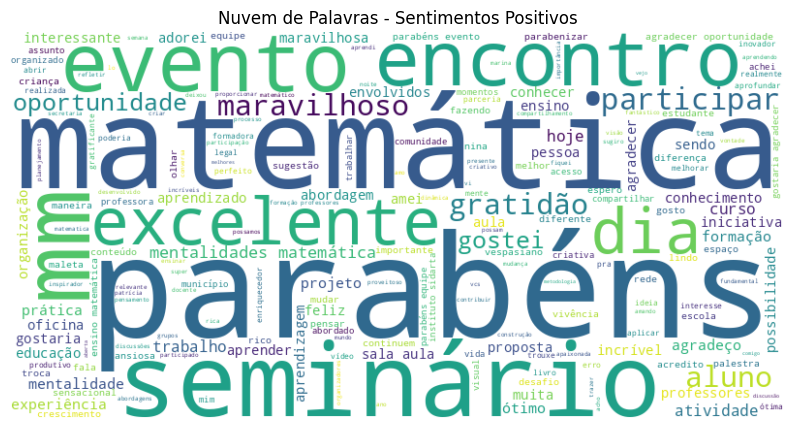

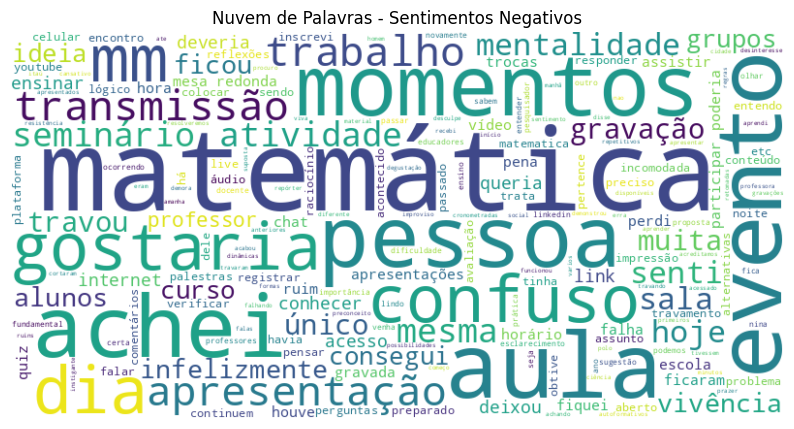

In [ ]:
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

!python -m spacy download pt_core_news_sm # download the correct model
# %%
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy

# Carregar modelo de linguagem do spaCy para português
nlp = spacy.load("pt_core_news_sm") # load the correct model

# Função para pré-processar o texto
def preprocess_text(text):
    # Processar o texto com spaCy
    doc = nlp(text)

    # Filtrar tokens: remover stopwords, pontuações e espaços em branco
    filtered_tokens = [
        token.text.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Juntar os tokens em uma única string
    return " ".join(filtered_tokens)

# Filtrar os comentários para sentimentos específicos
positive_comments = df[df['Sentimento'] > 3]['Comentário'].dropna()
negative_comments = df[df['Sentimento'] < 3]['Comentário'].dropna()

# Pré-processar os comentários
positive_comments_cleaned = positive_comments.apply(preprocess_text)
negative_comments_cleaned = negative_comments.apply(preprocess_text)

# Gerar nuvem de palavras para sentimentos positivos
positive_text = ' '.join(positive_comments_cleaned)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Gerar nuvem de palavras para sentimentos negativos
negative_text = ' '.join(negative_comments_cleaned)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Exibir nuvem de palavras
plt.figure(figsize=(10, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Sentimentos Positivos")
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Sentimentos Negativos")
plt.show()

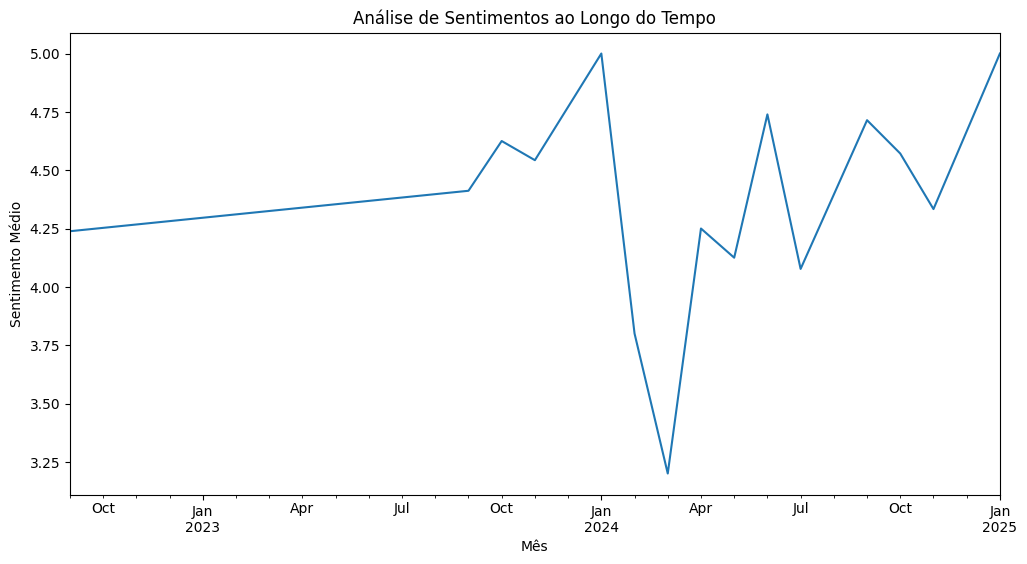

In [ ]:
# Adicionar uma coluna de data se necessário
# df['data'] = pd.to_datetime(df['data'])

#Calcular a média dos sentimentos por mês
df['month'] = df['Data'].dt.to_period('M')
sentiment_over_time = df.groupby('month')['Sentimento'].mean()

#Exibir a evolução do sentimento ao longo do tempo
sentiment_over_time.plot(figsize=(12, 6))
plt.title('Análise de Sentimentos ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Sentimento Médio')
plt.show()

In [ ]:
#Instalar pyLDAvis (se ainda não estiver instalado)
!pip install pyLDAvis

#Importar bibliotecas necessárias
import pyLDAvis
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
import pandas as pd
from google.colab import files  # Para carregar arquivos no Google Colab

# Baixar stopwords em português (se ainda não estiverem baixadas)
nltk.download('stopwords')

# Carregar stopwords em português
stop_words = nltk.corpus.stopwords.words('portuguese')

# Carregar o arquivo Excel
uploaded = files.upload()  # Abre a interface para upload de arquivos
file_path = list(uploaded.keys())[0]  # Obtém o nome do arquivo enviado
df = pd.read_excel(file_path)  # Carrega o arquivo Excel em um DataFrame

# Criar o vetorizador com stopwords em português
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(df['Comentário'].dropna())  # Usa a coluna 'Comentário'

# Aplicar LDA para encontrar tópicos
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)

# Exibir as 10 palavras mais importantes para cada tópico
for idx, topic in enumerate(lda.components_):
    print(f"Top 10 palavras do Tópico #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

# Extrair as distribuições de tópicos-termos e documentos-tópicos
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]  # Normalizar as distribuições
doc_topic_dists = lda.transform(dtm)

# Preparar os dados para visualização
pyLDAvis.enable_notebook()
vis = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,  # Distribuição tópico-termo
    doc_topic_dists=doc_topic_dists,    # Distribuição documento-tópico
    doc_lengths=np.array(dtm.sum(axis=1)).flatten(),  # Tamanho de cada documento
    vocab=vectorizer.get_feature_names_out(),         # Vocabulário (palavras)
    term_frequency=np.array(dtm.sum(axis=0)).flatten()  # Frequência dos termos
)

# Exibir a visualização
pyLDAvis.display(vis)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving here_arquivo_ml_text_output.xlsx to here_arquivo_ml_text_output (2).xlsx
Top 10 palavras do Tópico #0:
['participar', 'ter', 'todos', 'bom', 'obrigada', 'evento', 'mm', 'seminário', 'matemática', 'parabéns']

Top 10 palavras do Tópico #1:
['seminário', 'formação', 'professores', 'encontro', 'maravilhoso', 'gratidão', 'sobre', 'mm', 'alunos', 'matemática']

